In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from matplotlib import style
style.use('ggplot')
import re
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
!pip install wordcloud
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

     -------------------------------------- 300.0/300.0 kB 3.1 MB/s eta 0:00:00


In [3]:
df = pd.read_csv('IMDB Dataset.csv')
df.head()

review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive

In [3]:
df.shape

(50000, 2)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


Text(0.5, 1.0, 'Sentiment distribution')

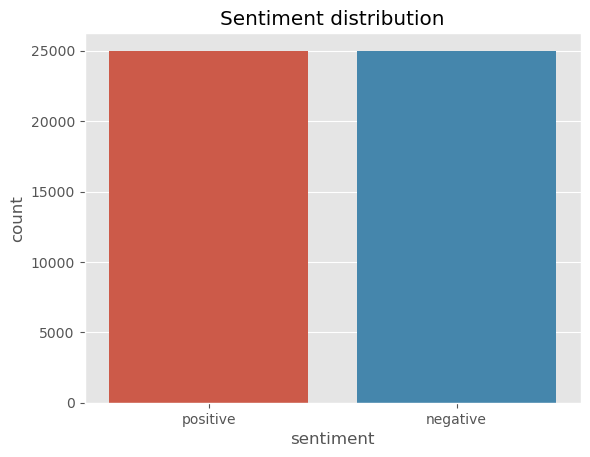

In [5]:
sns.countplot(x='sentiment', data=df)
plt.title("Sentiment distribution")

In [62]:
for i in range(5):
    print("Review: ", [i])
    print(df['review'].iloc[i], "\n")
    print("Sentiment: ", df['sentiment'].iloc[i], "\n\n")

Review:  [0]
one of the other reviewers has mentioned that after watching just 1 oz episode youll be hooked they are right as this is exactly what happened with methe first thing that struck me about oz was its brutality and unflinching scenes of violence which set in right from the word go trust me this is not a show for the faint hearted or timid this show pulls no punches with regards to drugs sex or violence its is hardcore in the classic use of the wordit is called oz as that is the nickname given to the oswald maximum security state penitentary it focuses mainly on emerald city an experimental section of the prison where all the cells have glass fronts and face inwards so privacy is not high on the agenda em city is home to manyaryans muslims gangstas latinos christians italians irish and moreso scuffles death stares dodgy dealings and shady agreements are never far awayi would say the main appeal of the show is due to the fact that it goes where other shows wouldnt dare forget p

In [7]:
def no_of_words(text):
    words= text.split()
    word_count = len(words)
    return word_count

In [8]:
df['word count'] = df['review'].apply(no_of_words)

In [9]:
df.head()

review sentiment  word count
0  One of the other reviewers has mentioned that ...  positive         307
1  A wonderful little production. <br /><br />The...  positive         162
2  I thought this was a wonderful way to spend ti...  positive         166
3  Basically there's a family where a little boy ...  negative         138
4  Petter Mattei's "Love in the Time of Money" is...  positive         230

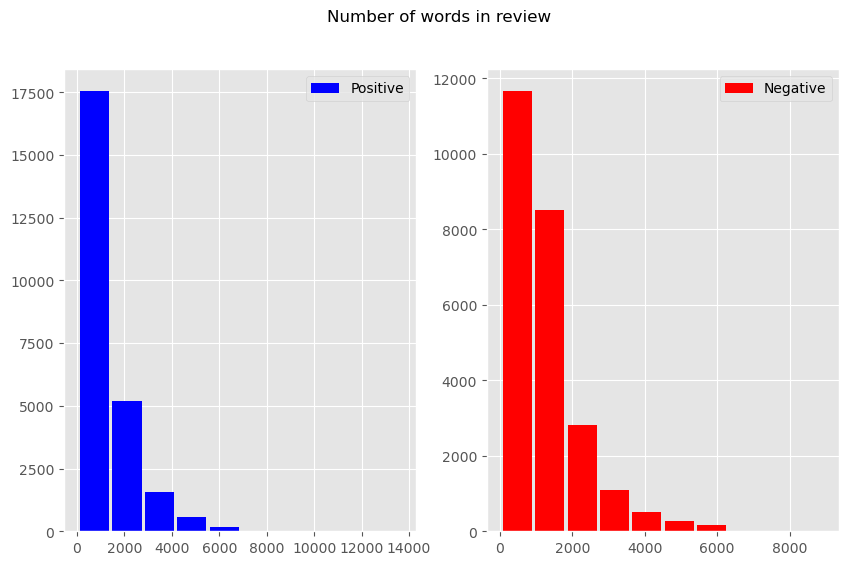

In [11]:
fig, ax = plt.subplots(1,2, figsize=(10,6))
ax[0].hist(df[df['sentiment'] == 'positive']['review'].str.len(), label='Positive', color='blue', rwidth=0.9);
ax[0].legend(loc='upper right');
ax[1].hist(df[df['sentiment'] == 'negative']['review'].str.len(), label='Negative', color='red', rwidth=0.9);
ax[1].legend(loc='upper right');
fig.suptitle("Number of words in review")
plt.show()

In [12]:
df.sentiment.replace("positive", 1, inplace=True)
df.sentiment.replace("negative", 2, inplace=True)

In [13]:
df.head()

review  sentiment  word count
0  One of the other reviewers has mentioned that ...          1         307
1  A wonderful little production. <br /><br />The...          1         162
2  I thought this was a wonderful way to spend ti...          1         166
3  Basically there's a family where a little boy ...          2         138
4  Petter Mattei's "Love in the Time of Money" is...          1         230

In [14]:
def data_processing(text):
    text= text.lower()
    text = re.sub('<br />', '', text)
    text = re.sub(r"https\S+|www\S+|http\S+", '', text, flags = re.MULTILINE)
    text = re.sub(r'\@w+|\#', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    text_tokens = word_tokenize(text)
    filtered_text = [w for w in text_tokens if not w in stop_words]
    return " ".join(filtered_text)

In [15]:
df.review = df['review'].apply(data_processing)

In [16]:
duplicated_count = df.duplicated().sum()
print("Number of duplicate entries: ", duplicated_count)

Number of duplicate entries:  421


In [17]:
df = df.drop_duplicates('review')

In [18]:
stemmer = PorterStemmer()
def stemming(data):
    text = [stemmer.stem(word) for word in data]
    return data

In [19]:
df.review = df['review'].apply(lambda x: stemming(x))

In [20]:
df['word count'] = df['review'].apply(no_of_words)
df.head()

review  sentiment  word count
0  one reviewers mentioned watching 1 oz episode ...          1         168
1  wonderful little production filming technique ...          1          84
2  thought wonderful way spend time hot summer we...          1          86
3  basically theres family little boy jake thinks...          2          67
4  petter matteis love time money visually stunni...          1         125

In [21]:
pos_reviews =  df[df.sentiment == 1]
pos_reviews.head()

review  sentiment  word count
0  one reviewers mentioned watching 1 oz episode ...          1         168
1  wonderful little production filming technique ...          1          84
2  thought wonderful way spend time hot summer we...          1          86
4  petter matteis love time money visually stunni...          1         125
5  probably alltime favorite movie story selfless...          1          58

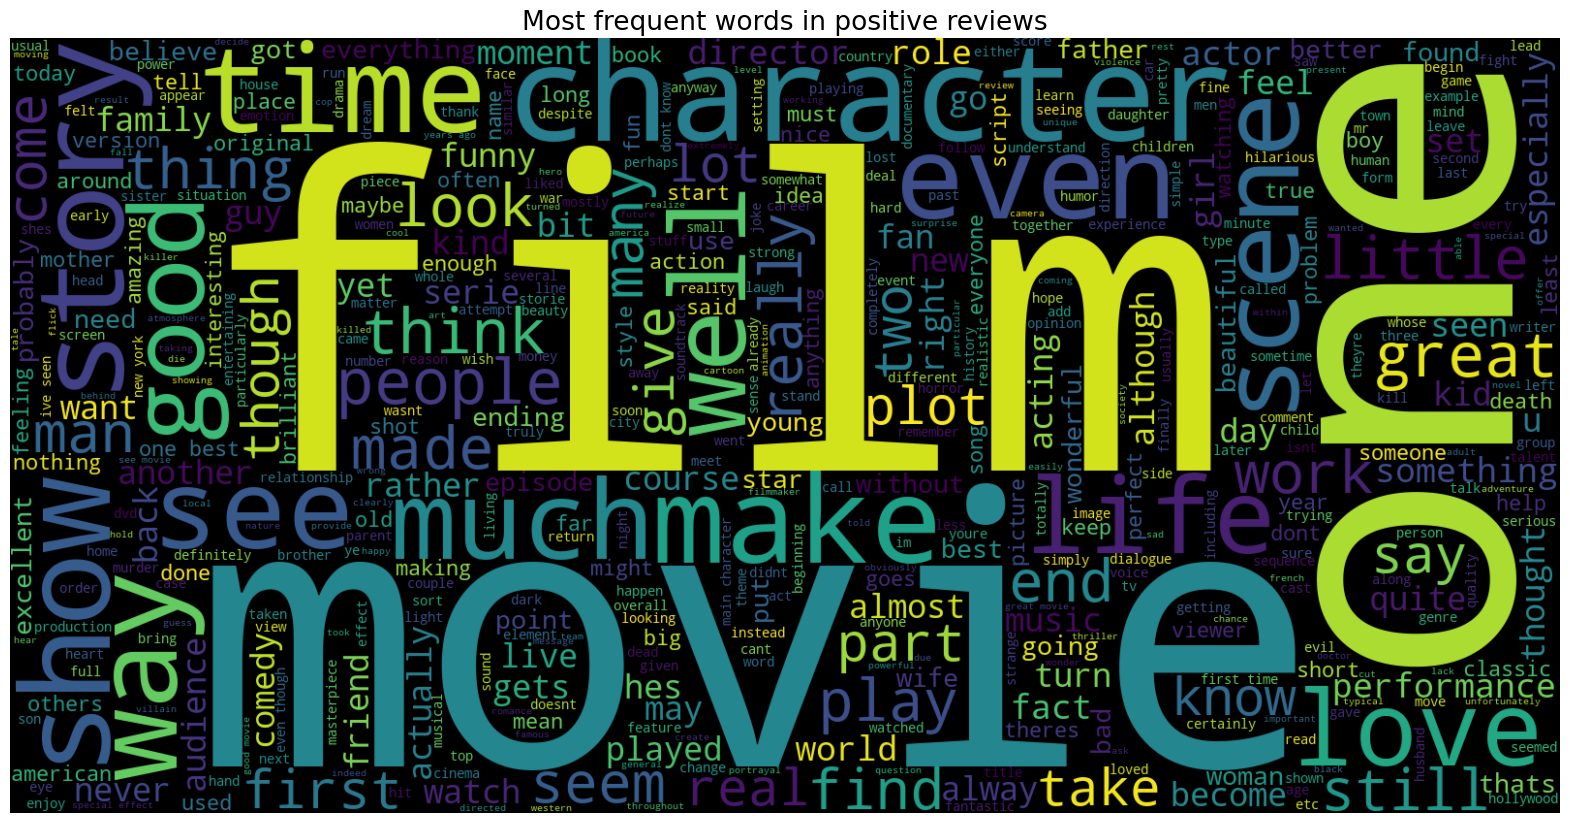

In [22]:
text = ' '.join([word for word in pos_reviews['review']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most frequent words in positive reviews', fontsize = 19)
plt.show()

In [23]:
from collections import Counter
count = Counter()
for text in pos_reviews['review'].values:
    for word in text.split():
        count[word] +=1
count.most_common(15)

[('film', 39285),
 ('movie', 35830),
 ('one', 25621),
 ('like', 16998),
 ('good', 14281),
 ('great', 12568),
 ('story', 12338),
 ('see', 11814),
 ('time', 11724),
 ('well', 10930),
 ('really', 10638),
 ('also', 10516),
 ('would', 10320),
 ('even', 9318),
 ('much', 8971)]

In [24]:
pos_words = pd.DataFrame(count.most_common(15))
pos_words.columns = ['word', 'count']
pos_words.head()

word  count
0   film  39285
1  movie  35830
2    one  25621
3   like  16998
4   good  14281

In [25]:
px.bar(pos_words, x='count', y='word', title='Common words in positive reviews', color = 'word')

In [26]:
neg_reviews =  df[df.sentiment == 2]
neg_reviews.head()

review  sentiment  word count
3   basically theres family little boy jake thinks...          2          67
7   show amazing fresh innovative idea 70s first a...          2          83
8   encouraged positive comments film looking forw...          2          64
10  phil alien one quirky films humour based aroun...          2          51
11  saw movie 12 came recall scariest scene big bi...          2          84

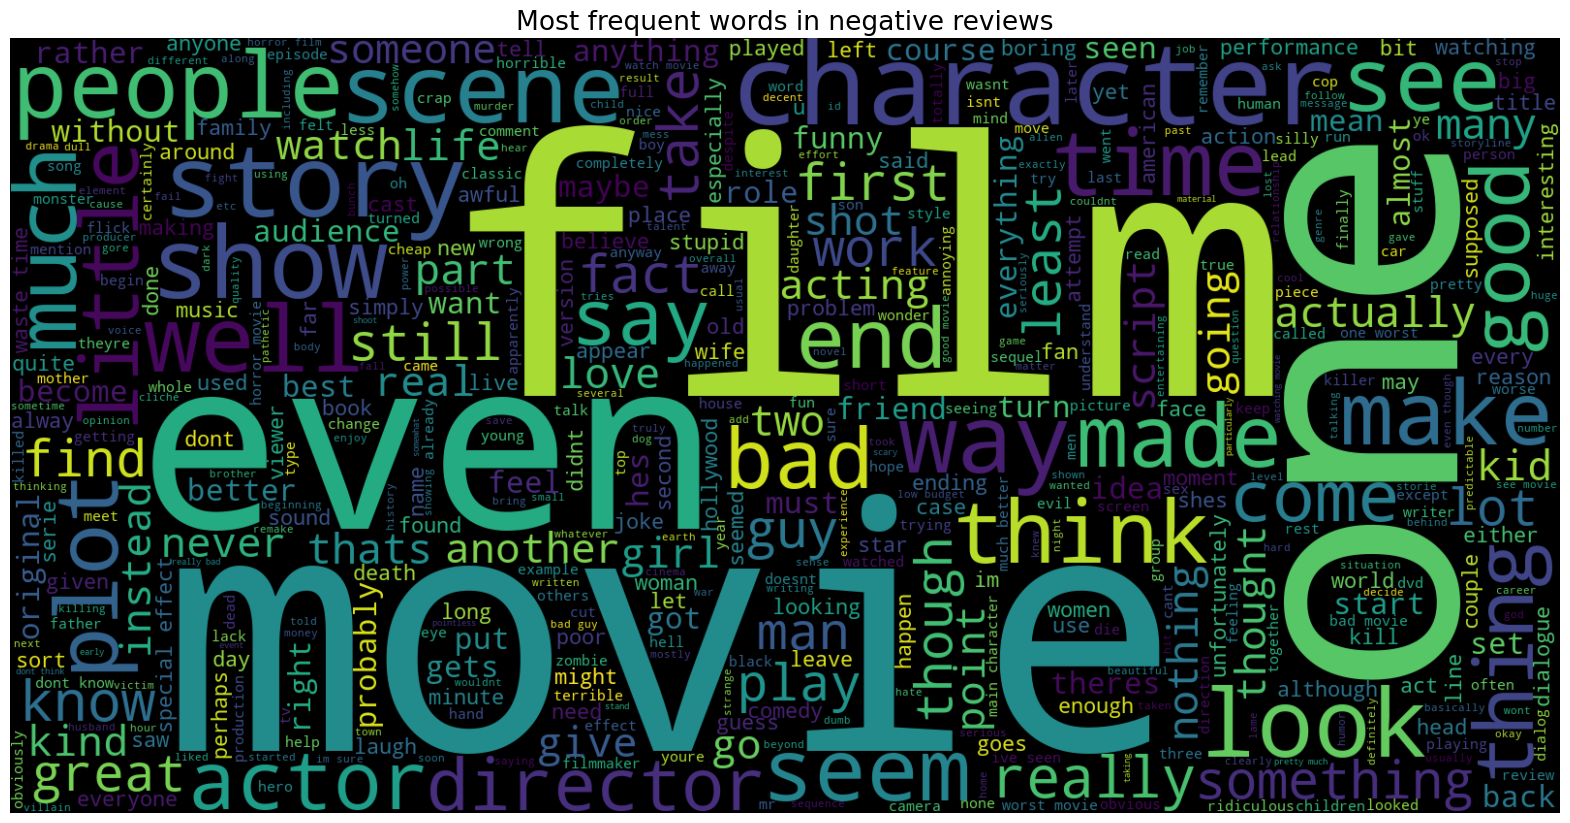

In [27]:
text = ' '.join([word for word in neg_reviews['review']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most frequent words in negative reviews', fontsize = 19)
plt.show()

In [28]:
count = Counter()
for text in neg_reviews['review'].values:
    for word in text.split():
        count[word] +=1
count.most_common(15)

[('movie', 47001),
 ('film', 34651),
 ('one', 24361),
 ('like', 21508),
 ('even', 14759),
 ('good', 13995),
 ('bad', 13903),
 ('would', 13482),
 ('really', 12084),
 ('time', 11349),
 ('see', 10412),
 ('dont', 9912),
 ('get', 9884),
 ('much', 9758),
 ('story', 9563)]

In [29]:
neg_words = pd.DataFrame(count.most_common(15))
neg_words.columns = ['word', 'count']
neg_words.head()

word  count
0  movie  47001
1   film  34651
2    one  24361
3   like  21508
4   even  14759

In [30]:
px.bar(neg_words, x='count', y='word', title='Common words in negative reviews', color = 'word')

In [86]:
X = df['review']
Y = df['sentiment']


In [32]:
vect = TfidfVectorizer()
X = vect.fit_transform(df['review'])

In [33]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [34]:
print("Size of x_train: ", (x_train.shape))
print("Size of y_train: ", (y_train.shape))
print("Size of x_test: ", (x_test.shape))
print("Size of y_test: ", (y_test.shape))

Size of x_train:  (34704, 221707)
Size of y_train:  (34704,)
Size of x_test:  (14874, 221707)
Size of y_test:  (14874,)


In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [36]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
logreg_pred = logreg.predict(x_test)
logreg_acc = accuracy_score(logreg_pred, y_test)
print("Test accuracy: {:.2f}%".format(logreg_acc*100))

Test accuracy: 89.00%


In [37]:
print(confusion_matrix(y_test, logreg_pred))
print("\n")
print(classification_report(y_test, logreg_pred))

[[6785  728]
 [ 908 6453]]


              precision    recall  f1-score   support

           1       0.88      0.90      0.89      7513
           2       0.90      0.88      0.89      7361

    accuracy                           0.89     14874
   macro avg       0.89      0.89      0.89     14874
weighted avg       0.89      0.89      0.89     14874



In [38]:
mnb = MultinomialNB()
mnb.fit(x_train, y_train)
mnb_pred = mnb.predict(x_test)
mnb_acc = accuracy_score(mnb_pred, y_test)
print("Test accuracy: {:.2f}%".format(mnb_acc*100))

Test accuracy: 86.44%


In [40]:
print(confusion_matrix(y_test, mnb_pred))
print("\n")
print(classification_report(y_test, mnb_pred))

[[6439 1074]
 [ 943 6418]]


              precision    recall  f1-score   support

           1       0.87      0.86      0.86      7513
           2       0.86      0.87      0.86      7361

    accuracy                           0.86     14874
   macro avg       0.86      0.86      0.86     14874
weighted avg       0.86      0.86      0.86     14874



In [42]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

count_vect_biwords = CountVectorizer(ngram_range=(2, 2))
X_counts_biwords = count_vect_biwords.fit_transform(df['review'])
biword_freq = np.asarray(X_counts_biwords.sum(axis=0)).ravel()
vocab_biwords = count_vect_biwords.get_feature_names_out()
biword_freq_df = pd.DataFrame({'biword': vocab_biwords, 'frequency': biword_freq})
biword_freq_df = biword_freq_df.sort_values(by='frequency', ascending=False)
print(biword_freq_df.head(15))

                  biword  frequency
952325         ever seen       2514
1522286         ive seen       2126
2721622  special effects       2122
813550         dont know       2039
947122       even though       1849
2049087         one best       1818
1719342       looks like       1611
1930153      much better       1408
3163321       waste time       1397
2544284        see movie       1381
1102711       first time       1309
1437631          im sure       1309
1522007         ive ever       1294
1248231       good movie       1275
1714644        look like       1238


In [65]:
import re
import pandas as pd

# Load IMDb dataset
df = pd.read_csv('IMDB Dataset.csv')

def data_processing(text):
    text = re.sub(r'<.*?>', '', text)
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)
    return text

df['review'] = df['review'].apply(data_processing)

def classify_genre(review):
    if 'funny' in review or 'humorous' in review or 'laugh' in review or 'comedy' in review:
        return 'COMEDY'
    elif 'action' in review or 'adventure' in review or 'thrilling' in review or 'exciting' in review:
        return 'ACTION'
    elif 'horror' in review or 'scary' in review or 'terrifying' in review or 'creepy' in review:
        return 'HORROR'
    elif 'romantic' in review or 'love' in review:
        return 'ROMANTIC'
    else:
        return 'UNKNOWN'

df['genre'] = df['review'].apply(classify_genre)

print(df.head(10))


                                              review sentiment     genre
0  a breathtaking cinematic experience the cinema...  positive  ROMANTIC
1  a wonderful little production the filming tech...  positive    COMEDY
2  i thought this was a wonderful way to spend ti...  positive    COMEDY
3  a spinechilling masterpiece that will leave yo...  negative    HORROR
4  petter matteis love in the time of money is a ...  positive    ACTION
5  probably my alltime favorite movie a story of ...  positive   UNKNOWN
6  i sure would like to see a resurrection of a u...  positive    ACTION
7  this show was an amazing fresh  innovative ide...  negative    COMEDY
8  encouraged by the positive comments about this...  negative   UNKNOWN
9  if you like original gut wrenching laughter yo...  positive    COMEDY


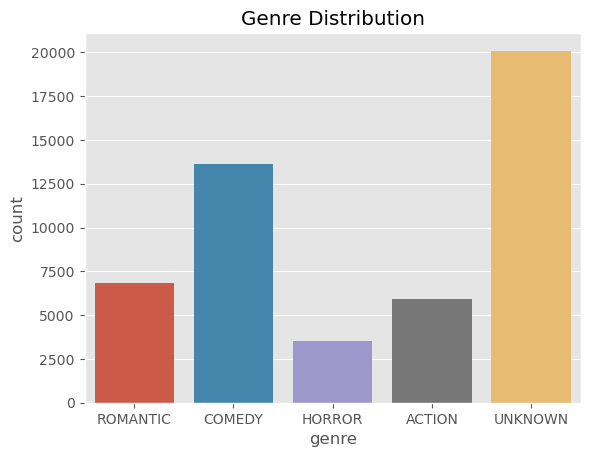

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='genre', data=df)
plt.title("Genre Distribution")
plt.show()


In [ ]:
import pandas as pd
import re
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

df = pd.read_csv('IMDB Dataset.csv')

def data_processing(text):
    
    text = re.sub(r'<.*?>', '', text)
    
    text = text.lower()
    
    text = re.sub(r'[^\w\s]', '', text)
    return text

df['review'] = df['review'].apply(data_processing)


stop_words = stopwords.words('english')


pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words=stop_words)),
    ('classifier', LogisticRegression())
])


pipeline.fit(df['review'], df['sentiment'])


sentiment_words = {
    'positive': ['good', 'great', 'excellent', 'wonderful', 'awesome','not bad'],
    'negative': ['bad', 'poor', 'terrible', 'awful', 'horrible','not good','boring']
}

genre_words = {
    'COMEDY': ['funny', 'humorous', 'laugh', 'comedy', 'hilarious'],
    'ACTION': ['action', 'adventure', 'thrilling', 'exciting', 'intense'],
    'HORROR': ['horror', 'scary', 'terrifying', 'creepy', 'spooky'],
    'ROMANTIC': ['romantic', 'love', 'passionate', 'heartfelt', 'emotional']
}

emotion_words = {
    'HAPPY': ['happy', 'joy', 'excited', 'delighted', 'gleeful'],
    'SAD': ['sad', 'cry', 'depressed', 'heartbroken', 'melancholy'],
    'ANGRY': ['angry', 'rage', 'furious', 'irate', 'outraged'],
    'FEAR': ['fear', 'scary', 'anxious', 'nervous', 'terrified']
}

def classify_genre(comment):
    for genre, words in genre_words.items():
        if any(word in comment for word in words):
            return genre
    return 'UNKNOWN'

def predict_sentiment(comment):
    for sentiment, words in sentiment_words.items():
        if any(word in comment for word in words):
            return sentiment
    
    return pipeline.predict([comment])[0]

def predict_emotion(comment):
    for emotion, words in emotion_words.items():
        if any(word in comment for word in words):
            return emotion
    return 'UNKNOWN'


user_comment = input("Enter your comment: ")


user_comment = data_processing(user_comment)


predicted_sentiment = predict_sentiment(user_comment)


predicted_genre = classify_genre(user_comment)


predicted_emotion = predict_emotion(user_comment)


print("Predicted sentiment:", predicted_sentiment)
print("Predicted genre:", predicted_genre)
print("Predicted emotion:", predicted_emotion)


In [5]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

# Load IMDb dataset
df = pd.read_csv('IMDB Dataset.csv')

# Preprocessing function
def data_processing(text):
    # Convert text to lowercase
    text = text.lower()
    # Remove HTML tags
    text = re.sub('<.*?>', '', text)
    # Remove URLs
    text = re.sub(r'https?\S+', '', text)
    # Remove non-alphanumeric characters
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    # Tokenize text
    tokens = word_tokenize(text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word not in stop_words]
    # Stemming
    stemmer = PorterStemmer()
    stemmed_tokens = [stemmer.stem(word) for word in filtered_tokens]
    # Join tokens back into text
    processed_text = ' '.join(stemmed_tokens)
    return processed_text

# Apply preprocessing to the 'review' column
df['review'] = df['review'].apply(data_processing)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df['review'], df['sentiment'], test_size=0.3, random_state=42)

# Vectorize text data using TF-IDF
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Initialize and train Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train_tfidf, y_train)

# Predictions
rf_pred = rf_classifier.predict(X_test_tfidf)

# Evaluation
accuracy = accuracy_score(y_test, rf_pred)
print("Random Forest Test Accuracy: {:.2f}%".format(accuracy * 100))
print("\nClassification Report:\n", classification_report(y_test, rf_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, rf_pred))


Random Forest Test Accuracy: 85.21%

Classification Report:
               precision    recall  f1-score   support

    negative       0.84      0.86      0.85      7411
    positive       0.86      0.84      0.85      7589

    accuracy                           0.85     15000
   macro avg       0.85      0.85      0.85     15000
weighted avg       0.85      0.85      0.85     15000


Confusion Matrix:
 [[6375 1036]
 [1182 6407]]
